 ### Standard methods
 
   * ARIMA
   * Seasonal decomposition
   * Exponential smoothing [holt winters, etc. etc.]
   * LOCF (Last Observation Carried Forward)
   
### Arima shit
  * auto.arima()
  * Arima()
  
### Exponential smoothings
  * ets() automated parameter selection
  * ses(), simple exponetal smoothing
  * hw(), Holt-Winters exponential smoothing
  * holt(), Holt linear trend model

### Neural network model

  * nnetar()
  
### Plots

  * combinations of "forecast" and "ggplot"
  * autoplot()
  * monthplot and seasonplot
  * autolayer() for layering models, several models into one chart
  * dygraphs package for interactive data visualizations charts, online etc. etc.
  
### Focus on three diffrent characteristics

  * Trend, a clear pattern with a direction opposite to random, trends always come to an end sooner or later  
  trend dampening likeley occurs before an inherent changepoint, dampening parameter  
  ARIMA and Exponention smoothing works perfectly well with trending characteristics
  * Seasonality
  * Trend and seasonality
  
  
### ARIMA (Autoregressive Integrated Moving Average)

  * Autoregressive: Captures trend and seasonality (p)
  * Integration: Captures the diffrences betweeen the observations (d) , diffrence of values instead of original values, removes chaos and such, simplification process
  * Moving average: Captures movements along constant mean (q), some sort of randomness or movement along a constans mean is captured by this parameter

In [8]:
#install.packages("forecast")
install.packages("dygraphs")
library("forecast")

also installing the dependencies ‘yaml’, ‘htmlwidgets’



In [20]:
powerdata = read.csv("data/household_power_consumption.txt", sep=';')

In [18]:
spain = read.csv("data/spain.csv", sep=',')

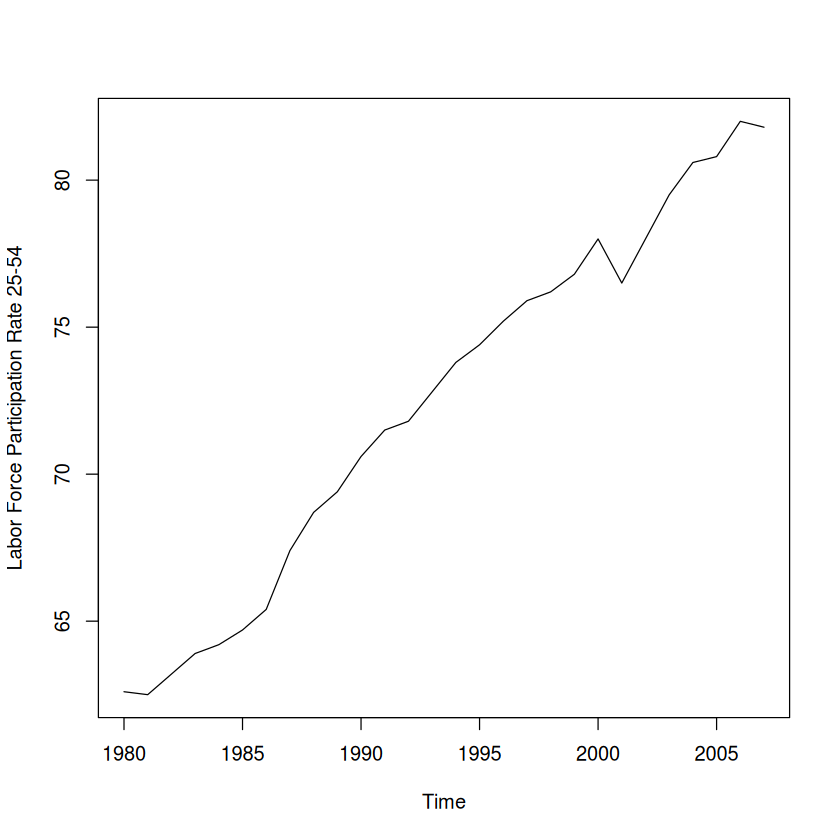

In [24]:
#### Project Trending Data - Spain LFPR

spain = ts(spain$x, start = 1980)

plot(spain, ylab = "Labor Force Participation Rate 25-54")


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(y = spain, h = 5) 

  Smoothing parameters:
    alpha = 0.7079 
    beta  = 1e-04 

  Initial states:
    l = 61.4459 
    b = 0.7427 

  sigma:  0.6791

     AIC     AICc      BIC 
77.31381 80.04109 83.97484 

Error measures:
                       ME      RMSE       MAE         MPE      MAPE      MASE
Training set -0.009959794 0.6287196 0.4625039 -0.01319646 0.6395872 0.5477021
                   ACF1
Training set 0.03231507

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       82.78834 81.91804 83.65863 81.45734 84.11934
2009       83.53103 82.46472 84.59735 81.90025 85.16182
2010       84.27373 83.04217 85.50529 82.39022 86.15724
2011       85.01642 83.63926 86.39359 82.91024 87.12261
2012       85.75912 84.25031 87.26793 83.45159 88.06665


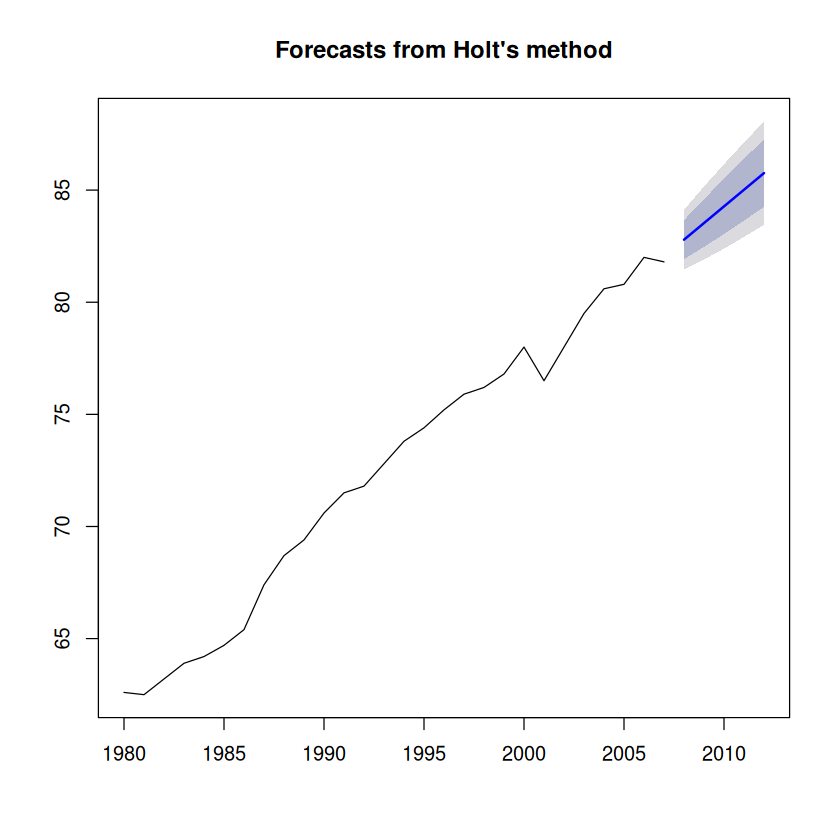

In [25]:
# Exponential smoothing with holt
library(forecast)
holttrend = holt(spain, h = 5)
summary(holttrend)
plot(holttrend)


Forecast method: Damped Holt's method

Model Information:
Damped Holt's method 

Call:
 holt(y = spain, h = 15, damped = T) 

  Smoothing parameters:
    alpha = 0.7679 
    beta  = 1e-04 
    phi   = 0.9798 

  Initial states:
    l = 61.3198 
    b = 0.9724 

  sigma:  0.7023

     AIC     AICc      BIC 
80.00318 84.00318 87.99641 

Error measures:
                      ME      RMSE       MAE         MPE      MAPE      MASE
Training set 0.003840492 0.6365071 0.4905089 -0.01106417 0.6814592 0.5808659
                   ACF1
Training set 0.00940966

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2008       82.48091 81.58088 83.38093 81.10444 83.85738
2009       83.00881 81.87400 84.14363 81.27326 84.74436
2010       83.52607 82.19728 84.85487 81.49386 85.55829
2011       84.03291 82.53501 85.53081 81.74207 86.32375
2012       84.52953 82.87972 86.17933 82.00637 87.05269
2013       85.01614 83.22725 86.80502 82.28027 87.75200
2014       85.49293 83.57499 87.41088 82

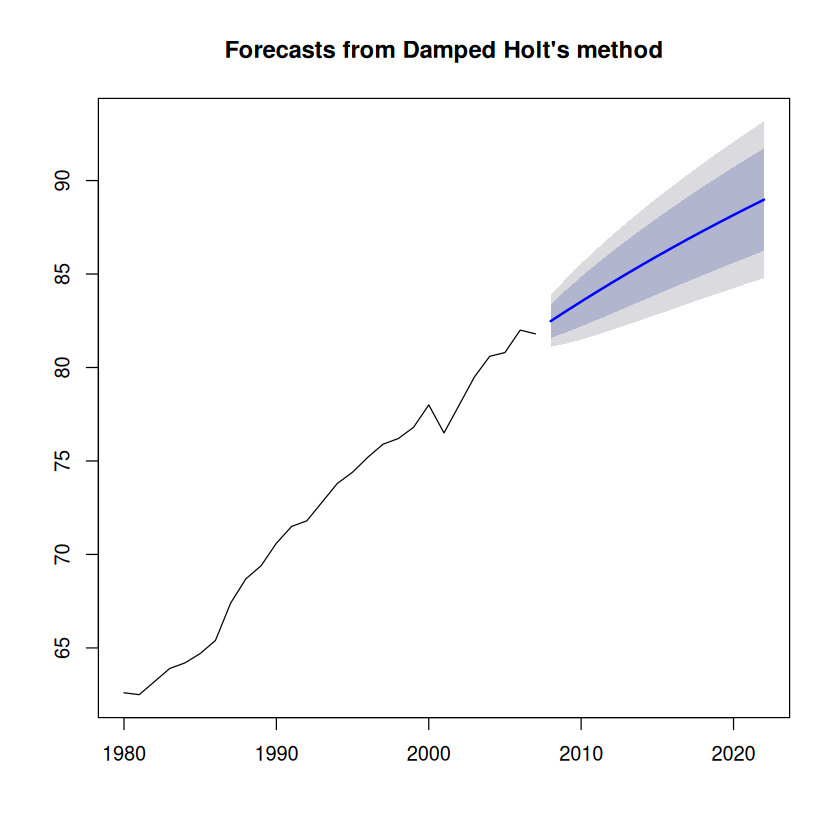

In [26]:
# Phi auto generated
plot(holt(spain, h = 15, damped = T))
# To see the generated value for phi
summary(holt(spain, h = 15, damped = T))

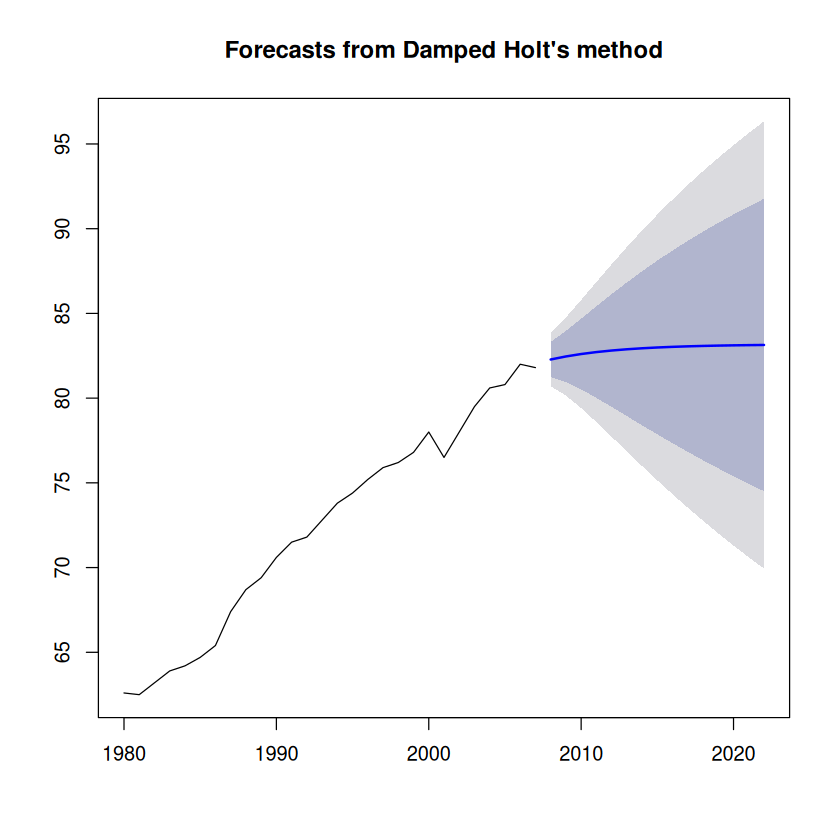

In [27]:
# Manual setting of phi
plot(holt(spain, h = 15, damped = T, phi = 0.8))

Series: spain 
ARIMA(0,1,0) with drift 

Coefficients:
       drift
      0.7111
s.e.  0.1259

sigma^2 estimated as 0.4442:  log likelihood=-26.84
AIC=57.69   AICc=58.19   BIC=60.28

Training set error measures:
                      ME      RMSE       MAE         MPE      MAPE      MASE
Training set 0.002210316 0.6422748 0.4426851 0.001813948 0.6010894 0.5242324
                   ACF1
Training set -0.1796088


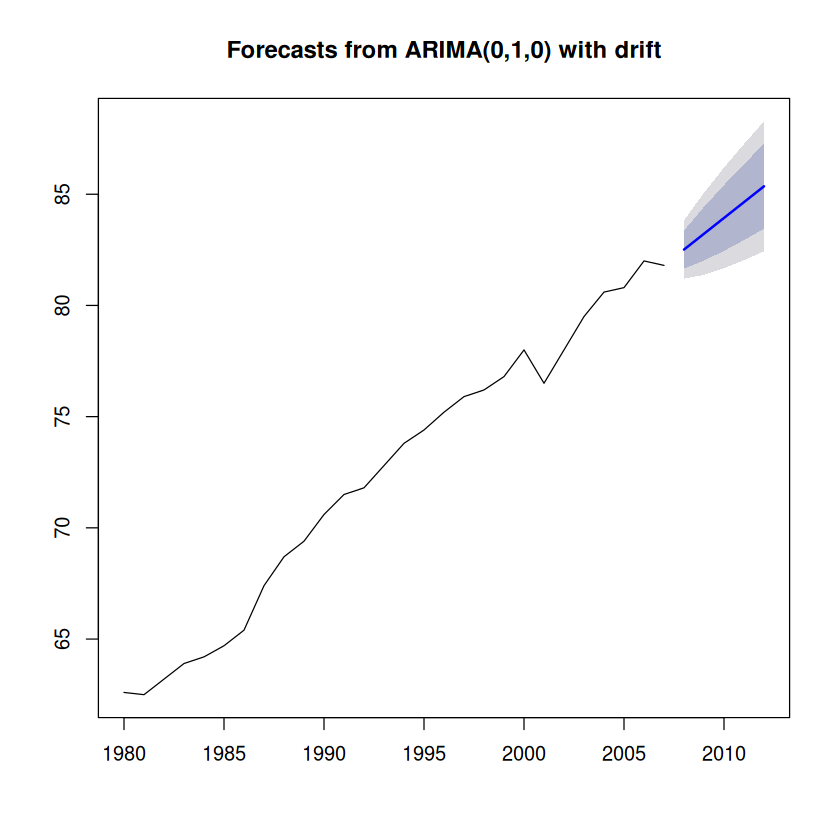

In [28]:
# Arima auto generated
spainarima = auto.arima(spain, 
                        stepwise = F, 
                        approximation = F)

summary(spainarima)

plot(forecast(spainarima, h = 5))

In [29]:
# Overview plot
holttrend = holt(spain, h = 10)
holtdamped = holt(spain, h = 10, damped = T, phi = 0.8)
arimafore = forecast(spainarima, h = 10)

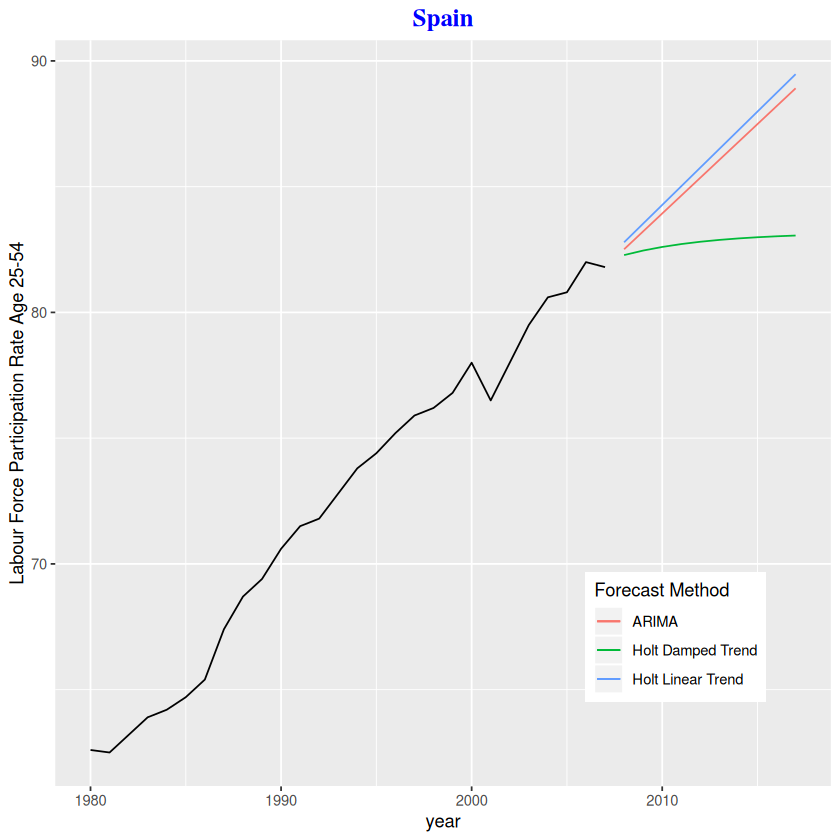

In [30]:
library(ggplot2)
# 3 Forecast Lines as Comparison
autoplot(spain) +
  forecast::autolayer(holttrend$mean, series = "Holt Linear Trend") +
  forecast::autolayer(holtdamped$mean, series = "Holt Damped Trend") +
  forecast::autolayer(arimafore$mean, series = "ARIMA") +
  xlab("year") + ylab("Labour Force Participation Rate Age 25-54") + 
  guides(colour=guide_legend(title="Forecast Method")) + theme(legend.position = c(0.8, 0.2)) +
  ggtitle("Spain") + theme(plot.title=element_text(family="Times", hjust = 0.5, color = "blue", face="bold", size=15))